Khai báo thư viện

In [1]:
import cv2
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

Load dữ liệu từ drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/Data_final/combined_faces.zip"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 extracting: content/combined_faces/1_1574.jpg  
 extracting: content/combined_faces/26_1801.jpg  
 extracting: content/combined_faces/3_306.jpg  
 extracting: content/combined_faces/2_632.jpg  
 extracting: content/combined_faces/26_439.jpg  
 extracting: content/combined_faces/35_868.jpg  
 extracting: content/combined_faces/45_418.jpg  
 extracting: content/combined_faces/24_792.jpg  
 extracting: content/combined_faces/35_697.jpg  
 extracting: content/combined_faces/24_928.jpg  
 extracting: content/combined_faces/78_69.jpg  
 extracting: content/combined_faces/12_31.jpg  
 extracting: content/combined_faces/60_117.jpg  
 extracting: content/combined_faces/27_323.jpg  
 extracting: content/combined_faces/1_613.jpg  
 extracting: content/combined_faces/52_260.jpg  
 extracting: content/combined_faces/27_700.jpg  
 extracting: content/combined_faces/59_79.jpg  
 extracting: content/combined_faces/3_190.jpg  
 extracting: conte

In [4]:
all_images = os.listdir('/content/content/combined_faces')
ranges = ['1-2','3-9','10-20','21-27','28-45','46-65','66-116']

X = []
y = []

l = len(all_images)

for a in range(l):
     X.append(cv2.imread(f'/content/content/combined_faces/{all_images[a]}',0))
     age = int(all_images[a].split('_')[0])
    
     if age>=1 and age<=2:
         y.append(0)
     elif age>=3 and age<=9:
         y.append(1)
     elif age>=10 and age<=20:
         y.append(2)
     elif age>=21 and age<=27:
         y.append(3)
     elif age>=28 and age<=45:
         y.append(4)
     elif age>=46 and age<=65:
         y.append(5)
     elif age>=66 and age<=116:
         y.append(6)
     print(str(a)+'/'+str(l))
np.savez_compressed('compressed image data.npz',x=X,y=y)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
28486/33486
28487/33486
28488/33486
28489/33486
28490/33486
28491/33486
28492/33486
28493/33486
28494/33486
28495/33486
28496/33486
28497/33486
28498/33486
28499/33486
28500/33486
28501/33486
28502/33486
28503/33486
28504/33486
28505/33486
28506/33486
28507/33486
28508/33486
28509/33486
28510/33486
28511/33486
28512/33486
28513/33486
28514/33486
28515/33486
28516/33486
28517/33486
28518/33486
28519/33486
28520/33486
28521/33486
28522/33486
28523/33486
28524/33486
28525/33486
28526/33486
28527/33486
28528/33486
28529/33486
28530/33486
28531/33486
28532/33486
28533/33486
28534/33486
28535/33486
28536/33486
28537/33486
28538/33486
28539/33486
28540/33486
28541/33486
28542/33486
28543/33486
28544/33486
28545/33486
28546/33486
28547/33486
28548/33486
28549/33486
28550/33486
28551/33486
28552/33486
28553/33486
28554/33486
28555/33486
28556/33486
28557/33486
28558/33486
28559/33486
28560/33486
28561/33486
28562/33486
28563/33486
28564/3

In [5]:
loaded = np.load('/content/compressed image data.npz')

X = loaded['x']
y = loaded['y']

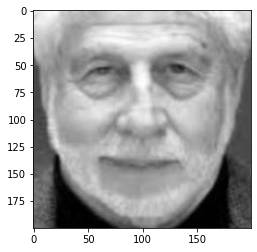

In [6]:
plt.imshow(X[0],cmap='gray')

In [7]:
from sklearn.model_selection import train_test_split

Xử lý dữ liệu

In [8]:
from keras.utils import np_utils

y = np_utils.to_categorical(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_train = np.array(X_train).reshape(-1,200,200,1)

In [11]:
X_test = np.array(X_test).reshape(-1,200,200,1)

In [12]:
IMG_HEIGHT = 200
IMG_WIDTH = 200
IMG_SIZE = (IMG_HEIGHT,IMG_WIDTH)
batch_size = 128
epochs = 60

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   height_shift_range=0.1,
                                   width_shift_range=0.1,
                                   rotation_range=15)

test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_data = train_datagen.flow(X_train,y_train,batch_size)

test_data = test_datagen.flow(X_test,y_test,batch_size)

Tạo model

In [15]:
model_age = Sequential()

model_age.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(200, 200, 1)))    # 3rd dim = 1 for grayscale images.
model_age.add(AveragePooling2D(pool_size=(2,2)))

model_age.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model_age.add(AveragePooling2D(pool_size=(2,2)))

model_age.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model_age.add(AveragePooling2D(pool_size=(2,2)))

model_age.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model_age.add(AveragePooling2D(pool_size=(2,2)))


model_age.add(GlobalAveragePooling2D())

model_age.add(Dense(132, activation='relu'))

model_age.add(Dense(7, activation='softmax'))

model_age.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 average_pooling2d (AverageP  (None, 99, 99, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 48, 48, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 23, 23, 128)      0

In [16]:
model_age.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Lưu model tốt nhất

In [17]:
checkpoint = ModelCheckpoint(filepath="models/final_cnn_model_checkpoint.h5",
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1
                            )

Train model

In [18]:
history = model_age.fit(train_data,
                    batch_size=512,
                    validation_data=test_data,
                    epochs=60,
                    callbacks=[checkpoint],
                    shuffle=False    # shuffle=False to reduce randomness and increase reproducibility
                    ) 

Epoch 1/60
184/184 [==============================] - ETA: 0s - loss: 1.8057 - accuracy: 0.2791
Epoch 1: val_accuracy improved from -inf to 0.30221, saving model to models/final_cnn_model_checkpoint.h5
184/184 [==============================] - 95s 431ms/step - loss: 1.8057 - accuracy: 0.2791 - val_loss: 1.7596 - val_accuracy: 0.3022
Epoch 2/60
183/184 [============================>.] - ETA: 0s - loss: 1.7466 - accuracy: 0.3117
Epoch 2: val_accuracy improved from 0.30221 to 0.31376, saving model to models/final_cnn_model_checkpoint.h5
184/184 [==============================] - 76s 415ms/step - loss: 1.7467 - accuracy: 0.3117 - val_loss: 1.7195 - val_accuracy: 0.3138
Epoch 3/60
183/184 [============================>.] - ETA: 0s - loss: 1.7172 - accuracy: 0.3238
Epoch 3: val_accuracy improved from 0.31376 to 0.32650, saving model to models/final_cnn_model_checkpoint.h5
184/184 [==============================] - 78s 422ms/step - loss: 1.7173 - accuracy: 0.3237 - val_loss: 1.6804 - val_acc

Đánh giá độ chính xác 

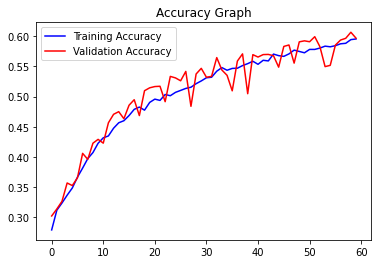

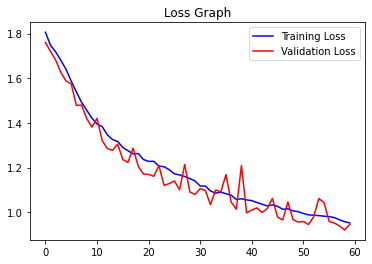

In [22]:
# plot results for gender
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()